<a href="https://colab.research.google.com/github/Samar-080301/Python_Project/blob/master/BSE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

In [2]:
 #ref https://www.kaggle.com/mikalaichaly/compare-different-scalers-on-data-with-outliers

In [3]:
def download_stock_data(stock):
    url = "https://query1.finance.yahoo.com/v7/finance/download/"+stock+".BO?period1=1577110559&period2=1608732959&interval=1d&events=history&includeAdjustedClose=true"
    r = requests.get(url)
    open(stock+'.csv','wb').write(r.content)  

In [4]:
index = ['RELIANCE','INFY','HCLTECH','TCS','BAJAJ-AUTO',
         'TITAN','LT','NESTLEIND','TECHM','ASIANPAINT',
         'M&M','ICICIBANK','POWERGRID','HINDUNILVR','SUNPHARMA',
         'TATASTEEL','AXISBANK','SBIN','ULTRACEMCO','BAJAJFINSV',
        'ITC','NTPC','BAJFINANCE','BHARTIARTL','MARUTI',
         'KOTAKBANK','HDFC','HDFCBANK','ONGC','INDUSINDBK']

In [5]:
a=1
for i in index:
    download_stock_data(i)
    print(a)
    a+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [6]:
a = pd.read_csv(r'/content/ASIANPAINT.csv',date_parser='Date')

In [7]:
ac = a['Close']

In [8]:
ac = np.array(ac)
print(ac)

[1807.449951 1803.400024 1810.099976 1812.949951 1802.400024 1786.849976
 1793.75     1790.25     1751.650024 1707.5      1723.900024 1730.849976
 1773.       1791.050049 1805.25     1818.550049 1841.75     1834.949951
 1831.199951 1848.599976 1810.25     1778.300049 1775.300049 1786.099976
 1787.050049 1778.699951 1796.5      1805.400024 1795.25     1867.400024
 1890.849976 1872.300049 1861.       1857.550049 1870.349976 1877.150024
 1892.050049 1874.050049 1877.199951 1881.349976 1863.300049 1886.25
 1842.849976 1818.75     1825.25     1826.550049 1844.349976 1798.199951
 1788.550049 1801.650024 1849.849976 1875.449951 1878.5      1878.5
 1882.650024 1842.849976 1797.599976 1682.949951 1734.199951 1616.650024
 1603.       1745.849976 1498.75     1525.25     1594.050049 1629.699951
 1606.199951 1597.150024 1666.699951 1603.900024 1521.300049 1624.050049
 1609.599976 1652.449951 1679.349976 1718.400024 1742.349976 1754.599976
 1731.650024 1725.599976 1812.650024 1820.400024 1827.400024

In [9]:
print(a[220:230])

           Date         Open         High  ...        Close    Adj Close    Volume
220  2020-11-09  2249.600098  2249.600098  ...  2224.949951  2224.949951   59095.0
221  2020-11-10  2227.000000  2238.550049  ...  2199.649902  2199.649902   57767.0
222  2020-11-11  2200.000000  2223.600098  ...  2181.899902  2181.899902   63840.0
223  2020-11-12  2172.000000  2200.550049  ...  2171.699951  2171.699951   46553.0
224  2020-11-13  2189.600098  2205.399902  ...  2179.550049  2179.550049  160362.0
225  2020-11-14          NaN          NaN  ...          NaN          NaN       NaN
226  2020-11-17  2189.000000  2222.699951  ...  2186.949951  2186.949951   29882.0
227  2020-11-18  2188.000000  2210.000000  ...  2196.000000  2196.000000   53482.0
228  2020-11-19  2183.000000  2194.600098  ...  2161.250000  2161.250000   41850.0
229  2020-11-20  2165.000000  2190.000000  ...  2163.850098  2163.850098   73781.0

[10 rows x 7 columns]


In [10]:
def remove_nan(ac):
    array1 = np.array(ac)
    nan_array = np.isnan(array1)
    not_nan_array = ~ nan_array
    ac = array1[not_nan_array]
    return ac

In [11]:
ac = remove_nan(ac)
print(ac)

[1807.449951 1803.400024 1810.099976 1812.949951 1802.400024 1786.849976
 1793.75     1790.25     1751.650024 1707.5      1723.900024 1730.849976
 1773.       1791.050049 1805.25     1818.550049 1841.75     1834.949951
 1831.199951 1848.599976 1810.25     1778.300049 1775.300049 1786.099976
 1787.050049 1778.699951 1796.5      1805.400024 1795.25     1867.400024
 1890.849976 1872.300049 1861.       1857.550049 1870.349976 1877.150024
 1892.050049 1874.050049 1877.199951 1881.349976 1863.300049 1886.25
 1842.849976 1818.75     1825.25     1826.550049 1844.349976 1798.199951
 1788.550049 1801.650024 1849.849976 1875.449951 1878.5      1878.5
 1882.650024 1842.849976 1797.599976 1682.949951 1734.199951 1616.650024
 1603.       1745.849976 1498.75     1525.25     1594.050049 1629.699951
 1606.199951 1597.150024 1666.699951 1603.900024 1521.300049 1624.050049
 1609.599976 1652.449951 1679.349976 1718.400024 1742.349976 1754.599976
 1731.650024 1725.599976 1812.650024 1820.400024 1827.400024

In [12]:
col = ac.reshape(-1, 1)
print(col)

[[1807.449951]
 [1803.400024]
 [1810.099976]
 [1812.949951]
 [1802.400024]
 [1786.849976]
 [1793.75    ]
 [1790.25    ]
 [1751.650024]
 [1707.5     ]
 [1723.900024]
 [1730.849976]
 [1773.      ]
 [1791.050049]
 [1805.25    ]
 [1818.550049]
 [1841.75    ]
 [1834.949951]
 [1831.199951]
 [1848.599976]
 [1810.25    ]
 [1778.300049]
 [1775.300049]
 [1786.099976]
 [1787.050049]
 [1778.699951]
 [1796.5     ]
 [1805.400024]
 [1795.25    ]
 [1867.400024]
 [1890.849976]
 [1872.300049]
 [1861.      ]
 [1857.550049]
 [1870.349976]
 [1877.150024]
 [1892.050049]
 [1874.050049]
 [1877.199951]
 [1881.349976]
 [1863.300049]
 [1886.25    ]
 [1842.849976]
 [1818.75    ]
 [1825.25    ]
 [1826.550049]
 [1844.349976]
 [1798.199951]
 [1788.550049]
 [1801.650024]
 [1849.849976]
 [1875.449951]
 [1878.5     ]
 [1878.5     ]
 [1882.650024]
 [1842.849976]
 [1797.599976]
 [1682.949951]
 [1734.199951]
 [1616.650024]
 [1603.      ]
 [1745.849976]
 [1498.75    ]
 [1525.25    ]
 [1594.050049]
 [1629.699951]
 [1606.199

In [13]:
df = pd.DataFrame(ac)
scalers = [
    #('Unscaled data', X),
    ('Standard Scaling', StandardScaler()),
    ('Min-Max Scaling', MinMaxScaler()),
    ('Max-abs Sscaling', MaxAbsScaler()),
    ('Robust Scaling', RobustScaler(quantile_range=(25, 75))),
    ('Quantile Transformation (uniform pdf)', QuantileTransformer(output_distribution='uniform')),
    ('Quantile Transformation (gaussian pdf)', QuantileTransformer(output_distribution='normal')),
    ('Sample-Wise L2 Normalizing', Normalizer())
]

for scaler in scalers:
    df[scaler[0]] = scaler[1].fit_transform(col)
df.rename(columns={0: "Close"},inplace = True)    
df.head()    

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (251). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (251). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


,Close,Standard Scaling,Min-Max Scaling,Max-abs Sscaling,Robust Scaling,Quantile Transformation (uniform pdf),Quantile Transformation (gaussian pdf),Sample-Wise L2 Normalizing
0,1807.449951,-0.280326,0.269843,0.683928,-0.009107,0.492,-0.020054,1.0
1,1803.400024,-0.296723,0.266302,0.682395,-0.022278,0.476,-0.060195,1.0
2,1810.099976,-0.269596,0.272159,0.684930,-0.000488,0.496,-0.010027,1.0
3,1812.949951,-0.258057,0.274650,0.686009,0.008781,0.508,0.020054,1.0
4,1802.400024,-0.300772,0.265428,0.682017,-0.025530,0.472,-0.070243,1.0


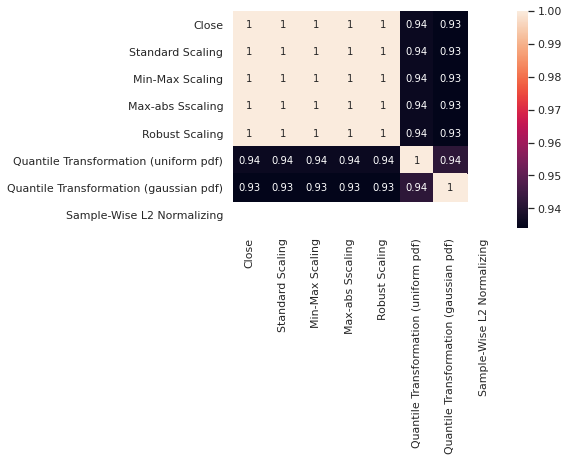

In [14]:
sns.heatmap(df.corr(), annot = True)

In [15]:
df['Sample-Wise L2 Normalizing'].unique()

array([1.])

In [16]:
s = np.array(df['Standard Scaling'])
mm = np.array(df['Min-Max Scaling'])
ma = np.array(df['Max-abs Sscaling'])
r = np.array(df['Robust Scaling'])
q = np.array(df['Quantile Transformation (uniform pdf)'])
g = np.array(df['Quantile Transformation (gaussian pdf)'])

In [17]:
def pn(i):
    s = np.array(df[i])
    print(s[0],' to ',s[len(s)-1])


In [18]:
for i in df.columns:
    print(i,'\t')
    pn(i)
    print('\n')

Close 	
1807.449951  to  2642.75


Standard Scaling 	
-0.28032561485101265  to  3.101677009060396


Min-Max Scaling 	
0.26984261451048974  to  1.0


Max-abs Sscaling 	
0.683927708258443  to  1.0


Robust Scaling 	
-0.009106589698705328  to  2.707536876737634


Quantile Transformation (uniform pdf) 	
0.492  to  1.0


Quantile Transformation (gaussian pdf) 	
-0.020054370352950636  to  5.19933758270342


Sample-Wise L2 Normalizing 	
1.0  to  1.0




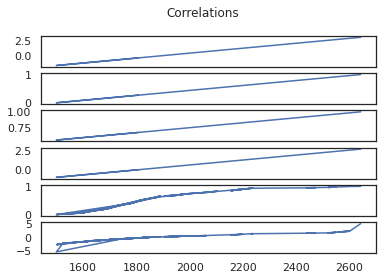

In [19]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6)
fig.suptitle('Correlations')
ax1.plot(df['Close'], df['Standard Scaling'])
ax2.plot(df['Close'], df['Min-Max Scaling'])
ax3.plot(df['Close'], df['Max-abs Sscaling'])
ax4.plot(df['Close'], df['Robust Scaling'])
ax5.plot(df['Close'], df['Quantile Transformation (uniform pdf)'])
ax6.plot(df['Close'], df['Quantile Transformation (gaussian pdf)'])

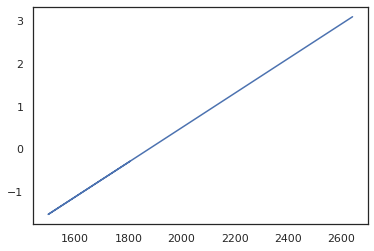

In [20]:
plt.plot(df['Close'], df['Standard Scaling'])

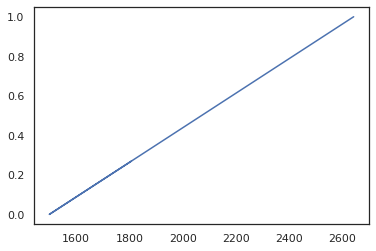

In [21]:
plt.plot(df['Close'], df['Min-Max Scaling'])

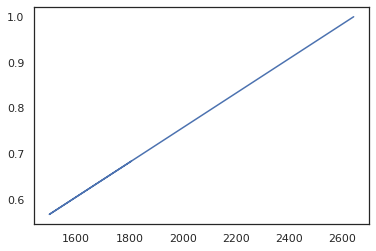

In [22]:
plt.plot(df['Close'], df['Max-abs Sscaling'])

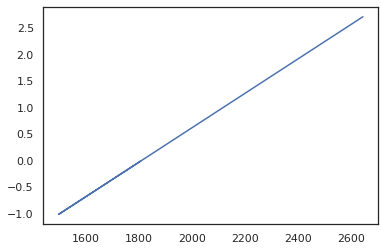

In [23]:
plt.plot(df['Close'], df['Robust Scaling'])

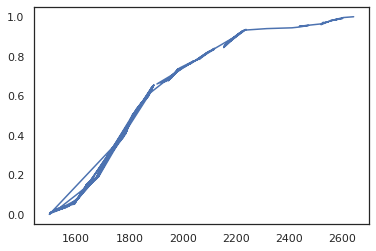

In [24]:
plt.plot(df['Close'], df['Quantile Transformation (uniform pdf)'])

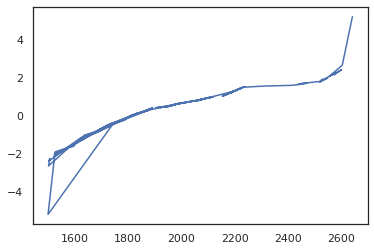

In [25]:
plt.plot(df['Close'], df['Quantile Transformation (gaussian pdf)'])

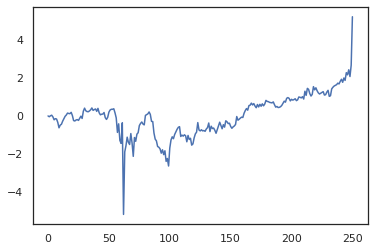

In [26]:
plt.plot(df['Quantile Transformation (gaussian pdf)'])#indicator

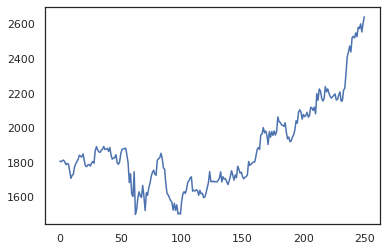

In [27]:
plt.plot(df['Close'])

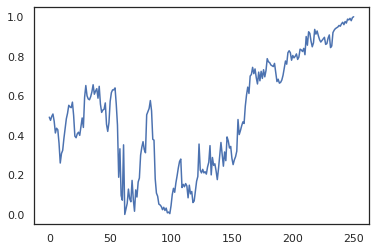

In [28]:
plt.plot(df['Quantile Transformation (uniform pdf)'])#indicator

In [29]:
r = pd.read_csv(r'/content/RELIANCE.csv',date_parser='Date')
r.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-23,1555.0,1577.0,1555.0,1571.0,1565.124268,1274110.0


In [30]:
rc = r['Close']
rc = np.array(rc)
print(rc)

[1571.       1545.949951 1515.949951 1542.150024 1544.199951 1514.099976
 1509.699951 1535.349976 1537.25     1501.5      1525.050049 1513.949951
 1547.949951 1547.699951 1543.449951 1529.050049 1524.       1537.699951
 1580.650024 1532.       1533.949951 1533.099976 1527.       1521.699951
 1506.599976 1471.349976 1479.699951 1442.5      1411.699951 1385.849976
 1425.849976 1448.050049 1457.650024 1433.75     1436.75     1452.599976
 1470.       1473.949951 1486.650024 1478.400024 1466.099976 1504.199951
 1485.5      1444.849976 1416.300049 1391.400024 1385.800049 1328.650024
 1314.849976 1343.650024 1339.150024 1311.5      1270.050049 1270.050049
 1153.25     1061.599976 1106.900024 1015.25     1008.900024  968.849976
  917.099976 1020.200012  883.849976  943.099976 1081.25     1074.75
 1065.5      1032.349976 1112.449951 1080.650024 1078.199951 1206.400024
 1192.150024 1219.199951 1189.25     1150.050049 1168.699951 1225.050049
 1244.449951 1236.050049 1363.349976 1371.5      1417.3

In [31]:
rc = remove_nan(rc)
print(rc)

[1571.       1545.949951 1515.949951 1542.150024 1544.199951 1514.099976
 1509.699951 1535.349976 1537.25     1501.5      1525.050049 1513.949951
 1547.949951 1547.699951 1543.449951 1529.050049 1524.       1537.699951
 1580.650024 1532.       1533.949951 1533.099976 1527.       1521.699951
 1506.599976 1471.349976 1479.699951 1442.5      1411.699951 1385.849976
 1425.849976 1448.050049 1457.650024 1433.75     1436.75     1452.599976
 1470.       1473.949951 1486.650024 1478.400024 1466.099976 1504.199951
 1485.5      1444.849976 1416.300049 1391.400024 1385.800049 1328.650024
 1314.849976 1343.650024 1339.150024 1311.5      1270.050049 1270.050049
 1153.25     1061.599976 1106.900024 1015.25     1008.900024  968.849976
  917.099976 1020.200012  883.849976  943.099976 1081.25     1074.75
 1065.5      1032.349976 1112.449951 1080.650024 1078.199951 1206.400024
 1192.150024 1219.199951 1189.25     1150.050049 1168.699951 1225.050049
 1244.449951 1236.050049 1363.349976 1371.5      1417.3

In [32]:
rc = rc.reshape(-1, 1)
print(rc)

[[1571.      ]
 [1545.949951]
 [1515.949951]
 [1542.150024]
 [1544.199951]
 [1514.099976]
 [1509.699951]
 [1535.349976]
 [1537.25    ]
 [1501.5     ]
 [1525.050049]
 [1513.949951]
 [1547.949951]
 [1547.699951]
 [1543.449951]
 [1529.050049]
 [1524.      ]
 [1537.699951]
 [1580.650024]
 [1532.      ]
 [1533.949951]
 [1533.099976]
 [1527.      ]
 [1521.699951]
 [1506.599976]
 [1471.349976]
 [1479.699951]
 [1442.5     ]
 [1411.699951]
 [1385.849976]
 [1425.849976]
 [1448.050049]
 [1457.650024]
 [1433.75    ]
 [1436.75    ]
 [1452.599976]
 [1470.      ]
 [1473.949951]
 [1486.650024]
 [1478.400024]
 [1466.099976]
 [1504.199951]
 [1485.5     ]
 [1444.849976]
 [1416.300049]
 [1391.400024]
 [1385.800049]
 [1328.650024]
 [1314.849976]
 [1343.650024]
 [1339.150024]
 [1311.5     ]
 [1270.050049]
 [1270.050049]
 [1153.25    ]
 [1061.599976]
 [1106.900024]
 [1015.25    ]
 [1008.900024]
 [ 968.849976]
 [ 917.099976]
 [1020.200012]
 [ 883.849976]
 [ 943.099976]
 [1081.25    ]
 [1074.75    ]
 [1065.5  

In [50]:
scale = MinMaxScaler()
rc = scale.fit_transform(rc)
print(rc)

[[0.47718748]
 [0.45979161]
 [0.43895828]
 [0.45715277]
 [0.45857633]
 [0.43767357]
 [0.434618  ]
 [0.45243052]
 [0.45374998]
 [0.42892359]
 [0.44527779]
 [0.43756939]
 [0.4611805 ]
 [0.46100689]
 [0.4580555 ]
 [0.44805557]
 [0.44454859]
 [0.45406244]
 [0.48388888]
 [0.45010415]
 [0.45145828]
 [0.45086802]
 [0.44663192]
 [0.44295133]
 [0.43246524]
 [0.40798608]
 [0.41378467]
 [0.38795137]
 [0.36656245]
 [0.34861108]
 [0.37638886]
 [0.39180557]
 [0.39847222]
 [0.38187498]
 [0.38395832]
 [0.39496524]
 [0.40704859]
 [0.40979161]
 [0.41861111]
 [0.41288194]
 [0.40434024]
 [0.43079856]
 [0.41781248]
 [0.3895833 ]
 [0.36975696]
 [0.35246528]
 [0.34857641]
 [0.3088889 ]
 [0.29930553]
 [0.31930556]
 [0.31618056]
 [0.29697916]
 [0.26819447]
 [0.26819447]
 [0.18708333]
 [0.12343749]
 [0.15489585]
 [0.09125001]
 [0.0868403 ]
 [0.05902777]
 [0.02309028]
 [0.09468752]
 [0.        ]
 [0.04114583]
 [0.13708334]
 [0.13256945]
 [0.12614584]
 [0.10312499]
 [0.15874997]
 [0.13666669]
 [0.13496525]
 [0.22

In [49]:
a = list(rc)
sorted(a)

[array([0.]),
 array([0.02309028]),
 array([0.04114583]),
 array([0.05902777]),
 array([0.0868403]),
 array([0.09125001]),
 array([0.09468752]),
 array([0.10312499]),
 array([0.12343749]),
 array([0.12614584]),
 array([0.13256945]),
 array([0.13496525]),
 array([0.13666669]),
 array([0.13708334]),
 array([0.15489585]),
 array([0.15874997]),
 array([0.18486115]),
 array([0.18708333]),
 array([0.19781247]),
 array([0.21208333]),
 array([0.21409724]),
 array([0.22399307]),
 array([0.23288191]),
 array([0.23694448]),
 array([0.24458336]),
 array([0.25041663]),
 array([0.26819447]),
 array([0.26819447]),
 array([0.29697916]),
 array([0.29930553]),
 array([0.3088889]),
 array([0.31618056]),
 array([0.31930556]),
 array([0.33298608]),
 array([0.33864582]),
 array([0.34857641]),
 array([0.34861108]),
 array([0.35246528]),
 array([0.36409722]),
 array([0.36656245]),
 array([0.36975696]),
 array([0.37048608]),
 array([0.37362498]),
 array([0.37489578]),
 array([0.37638886]),
 array([0.3766319]),

In [48]:
a = [1,4,3,2,5,7,8,4,33,2]
sorted(a)

[1, 2, 2, 3, 4, 4, 5, 7, 8, 33]